# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [78]:
df=pd.read_csv('store_sharing.csv')
print(df)
df.size
df.shape
df.columns
df.dtypes


                 timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0      2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1      2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2      2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3      2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4      2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                    ...   ...  ...  ...    ...         ...           ...   
17409  2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410  2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411  2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412  2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413  2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0          

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

### 3.Check missing values and if there are any dublicate rows or not.

In [79]:
df.isna()
df.isna().sum()
df.duplicated()
df.duplicated().sum()

0

In [80]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

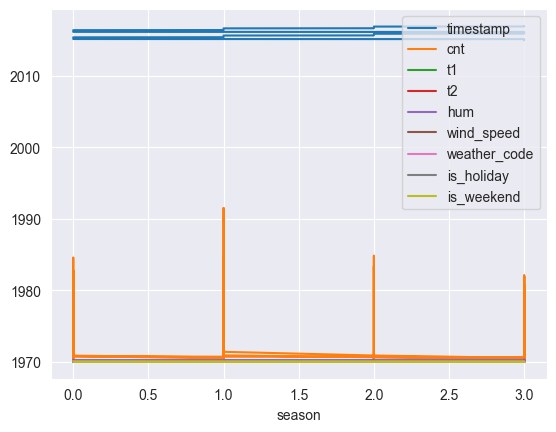

In [81]:
df=pd.read_csv('store_sharing.csv')
df['timestamp']= df['timestamp'].astype('datetime64[ns]')
# df=df.head(10)
  
d=[x for x in df.columns if x!='season']
for i in d:
        plt.plot(df['season'],df[i],label=i)
        plt.legend(loc=1)
plt.xlabel('season')
plt.show()




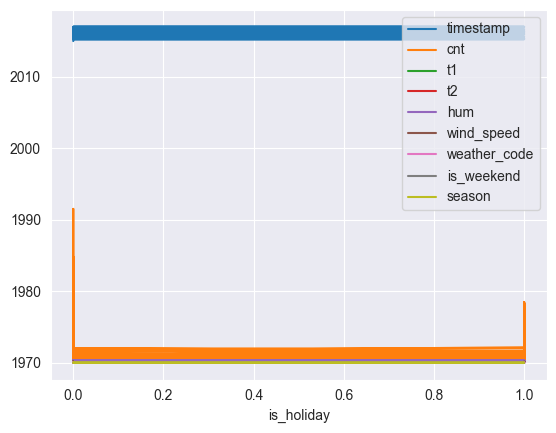

In [82]:
d=[x for x in df.columns if x!='is_holiday']
for i in d:
        plt.plot(df['is_holiday'],df[i],label=i)
        plt.legend(loc=1)
plt.xlabel('is_holiday')
plt.show()


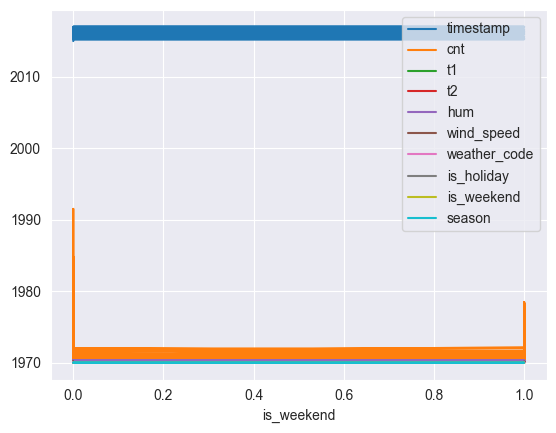

In [83]:
d=[x for x in df.columns if x!='is_weedend']
for i in d:
        plt.plot(df['is_holiday'],df[i],label=i)
        plt.legend(loc=1)
plt.xlabel('is_weekend')
plt.show()



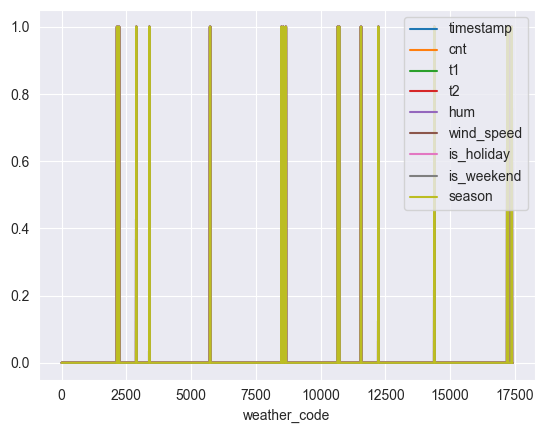

In [84]:
d=[x for x in df.columns if x!='weather_code']
for i in d:
        plt.plot(df['is_holiday'],label=i)
        plt.legend(loc=1)
plt.xlabel('weather_code')
plt.show()



### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [85]:
df=pd.read_csv('store_sharing.csv')
df['timestamp']= df['timestamp'].astype('datetime64[ns]') 
df=df.set_axis(df['timestamp'])

# df['timestamp']= pd.to_datetime(df['date'], format = '%yy%mm%dd')  
# df['month']=pd.DatetimeIndex(df['date']).month

In [123]:
df=df.pivot_table(index='timestamp')
print(df)

                      cnt  day  day_in_month  day_of_week  hour    hum  \
timestamp                                                                
2015-01-04 00:00:00   182    4            31            6     0   93.0   
2015-01-04 01:00:00   138    4            31            6     1   93.0   
2015-01-04 02:00:00   134    4            31            6     2   96.5   
2015-01-04 03:00:00    72    4            31            6     3  100.0   
2015-01-04 04:00:00    47    4            31            6     4   93.0   
...                   ...  ...           ...          ...   ...    ...   
2017-01-03 19:00:00  1042    3            31            1    19   81.0   
2017-01-03 20:00:00   541    3            31            1    20   81.0   
2017-01-03 21:00:00   337    3            31            1    21   78.5   
2017-01-03 22:00:00   224    3            31            1    22   76.0   
2017-01-03 23:00:00   139    3            31            1    23   76.0   

                     is_holiday  is_w

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [100]:
df=pd.read_csv('store_sharing.csv')
df['timestamp']= df['timestamp'].astype('datetime64[ns]')
df['year']=pd.DatetimeIndex(df['timestamp']).year
df['month']=pd.DatetimeIndex(df['timestamp']).month
df['day_of_week']=pd.DatetimeIndex(df['timestamp']).day_of_week
df['day']=pd.DatetimeIndex(df['timestamp']).day
df['day_in_month']=pd.DatetimeIndex(df['timestamp']).days_in_month
df['hour']=pd.DatetimeIndex(df['timestamp']).hour
df['Month_Year'] = df['timestamp'].apply(lambda x: x.strftime('%B-%Y'))
print(df)

                timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  year  month  day_of_week

In [101]:
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_week,day,day_in_month,hour,Month_Year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,4,31,0,January-2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,31,1,January-2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,31,2,January-2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,31,3,January-2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,31,4,January-2015
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,6,4,31,5,January-2015
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,6,4,31,6,January-2015
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,6,4,31,7,January-2015
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,6,4,31,8,January-2015
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,6,4,31,9,January-2015


### 7.Visualize the correlation with a heatmap

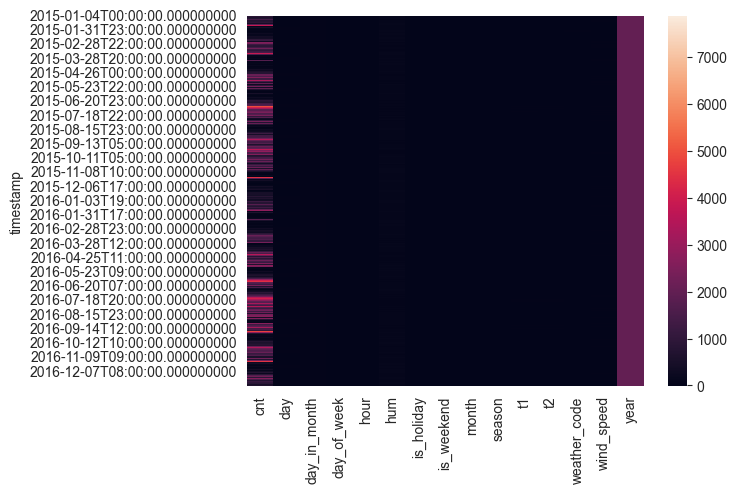

In [102]:
# for all variables 
# df=pd.read_csv('store_sharing.csv')
# df['timestamp']= df['timestamp'].astype('datetime64[ns]')
# print(df['timestamp'].dtype)
df1=pd.pivot_table(df,index='timestamp')
sns.heatmap(df1)
plt.show()

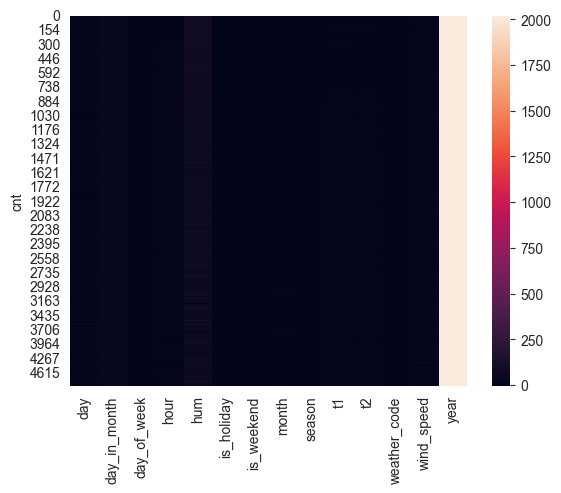

In [103]:
# for the target variable
# df=pd.read_csv('store_sharing.csv')
# df['timestamp']= df['timestamp'].astype('datetime64[ns]')
# print(df['timestamp'].dtype)
df2=pd.pivot_table(df,index='cnt')
sns.heatmap(df2)
plt.show()


### 8. Visualize the correlation of the target variable and the other features with barplot

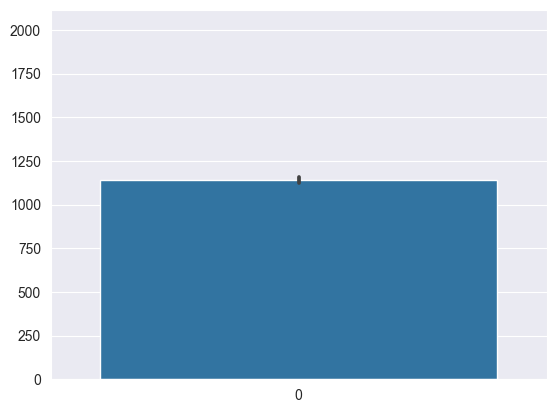

In [104]:
#with pandas
sns.barplot(data=df.loc[:,[x for x in df.columns if x!='cnt']])
sns.barplot(df['cnt'])
plt.show()



### 9.Plot bike shares over time use lineplot

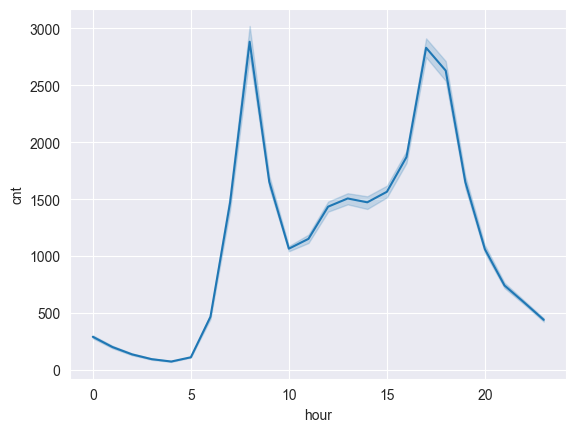

In [99]:
bike_share=df['cnt']
hour=df['hour']
sns.lineplot(x=hour,y=bike_share)
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

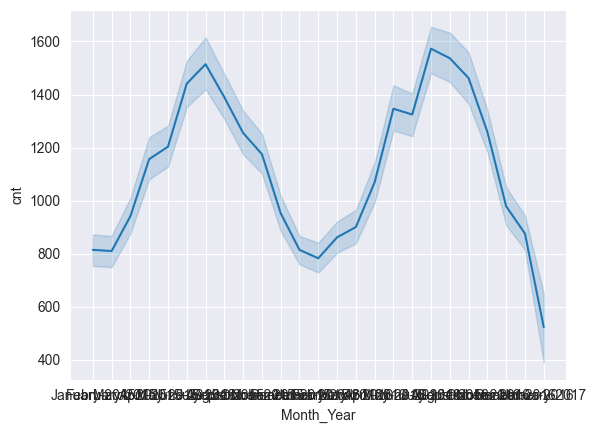

In [108]:
# from new import df['Month_Year']

# year_of_month=df['year']
# month=df['month']
# bike_share=df['cnt']
sns.lineplot(x=df['Month_Year'],y=df['cnt'])
plt.show()


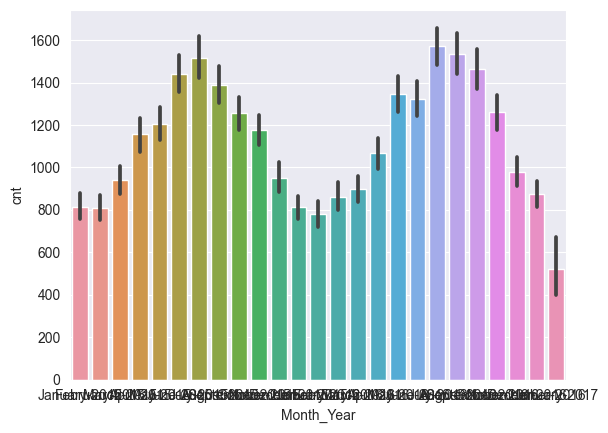

In [110]:
sns.barplot(data=df,x='Month_Year',y='cnt')
plt.show()

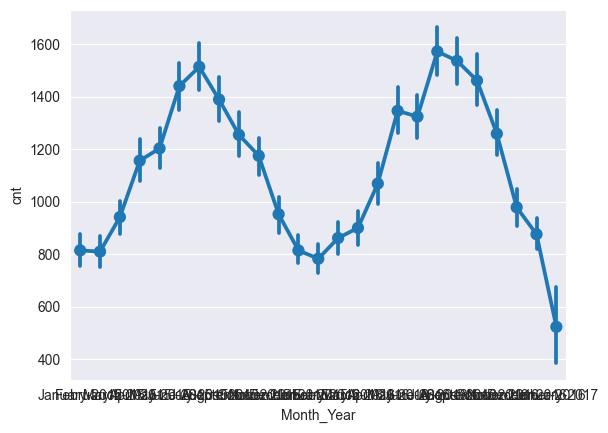

In [111]:
sns.pointplot(data=df,x='Month_Year',y='cnt')
plt.show()


### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot: >

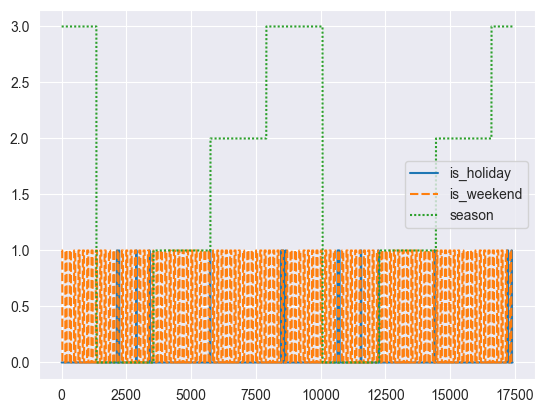

In [113]:
df3=df.loc[:,['is_holiday','is_weekend','season']]
sns.lineplot(df3)


In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


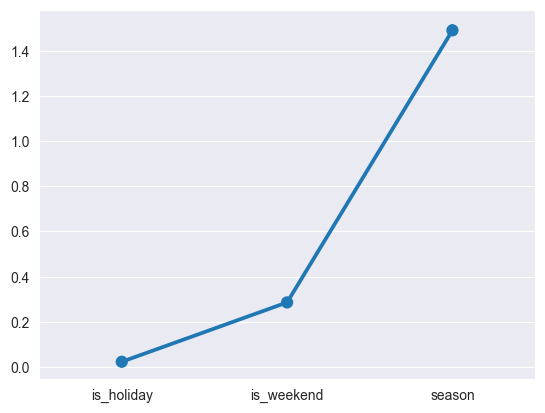

In [114]:
sns.pointplot(df3)
plt.show()


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [ ]:
# with barplot
df=df.loc[:,['cnt','is_holiday','month','day_of_week']]
sns.barplot(df)
plt.show()

In [ ]:
# with pointplot
df=df.loc[:,['cnt','is_holiday','month','day_of_week']]
sns.pointplot(df)
plt.show()

### 13.Plot bike shares by day of month

In [ ]:
#with lineplot
df=df.loc[:,['cnt','days_in_month']]
sns.pointplot(df)
plt.show()



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

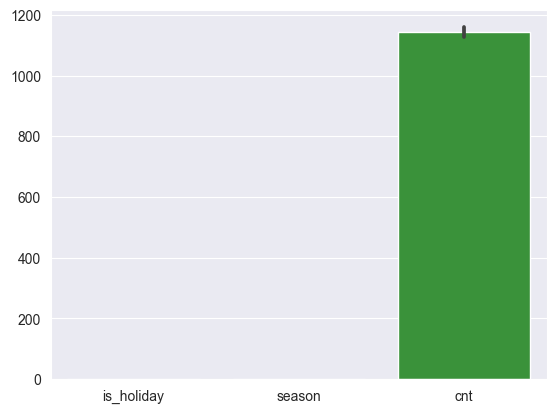

In [116]:
# with barplot
df4=df.loc[:,['is_holiday','season','cnt']]
sns.barplot(df4)
plt.show()


### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
# pie chart
# print(df[df['is_weekend']==1.0]['cnt'])
df5=df[df['is_weekend']==1.0]['cnt']
plt.pie(df5)

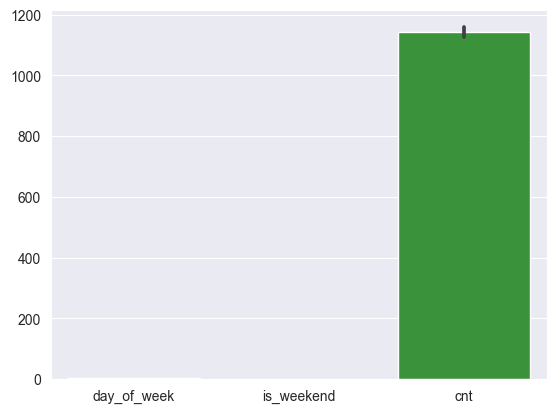

In [120]:
# with countplot
df6=df.loc[:,['day_of_week','is_weekend','cnt']]
sns.barplot(df6)
plt.show()




### 16.Plot the distribution of weather code by seasons

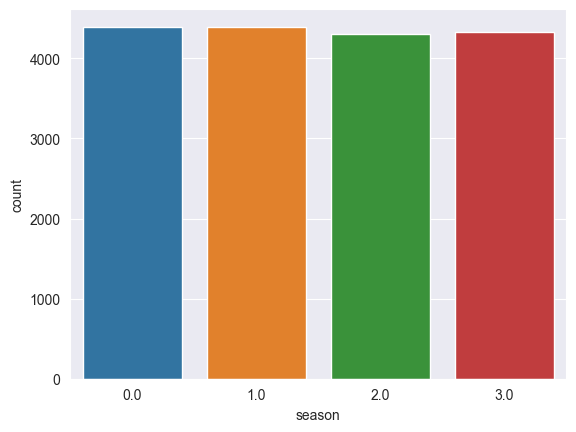

In [121]:
# with countplot
df7=df.loc[:,['weather_code','season']]
sns.countplot(df7,x='season')
plt.show()


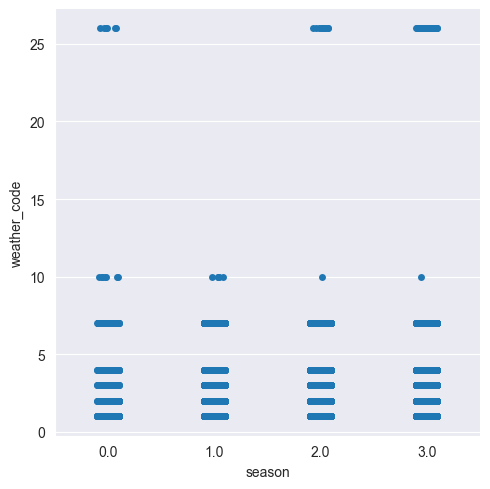

In [122]:
# with catplot
df8=df.loc[:,['weather_code','season']]
sns.catplot(data=df8, x="season", y="weather_code")
plt.show()